# <center>***模型评价***</center>
<br><br><br>

In [46]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC, SVR
from sklearn import metrics
from sklearn.metrics import roc_curve, auc

In [47]:
df_reg = pd.read_csv("data\\boston_house_prices.csv", header=1)
df_cls = pd.read_csv("data\\breast_cancer.csv")

X1 = df_reg.drop("MEDV", axis=1)
y1 = df_reg.MEDV
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=42)

X2 = df_cls.drop("benign", axis=1)
y2 = df_cls.benign
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=42)

## ***模型建立***

In [48]:
Model1 = SVR()
y1_pred = Model1.fit(X1_train, y1_train).predict(X1_test)

Model2 = SVC(probability=True)
y2_pred = Model2.fit(X2_train, y2_train).predict(X2_test)

## ***模型评价***

### **回归模型评价**

In [49]:
from sklearn.metrics import mean_squared_error

# Mean Squared Error（均方误差）
print(mean_squared_error(y1_test, y1_pred))

52.83836576796669


In [50]:
from sklearn.metrics import mean_absolute_error

# Mean Absolute Error（平均绝对误差）
print(mean_absolute_error(y1_test, y1_pred))

4.530585721759495


In [51]:
from sklearn.metrics import r2_score

# R² score（决定系数、R方）
print(r2_score(y1_test, y1_pred))

0.27948125010200286


### **分类模型评价**

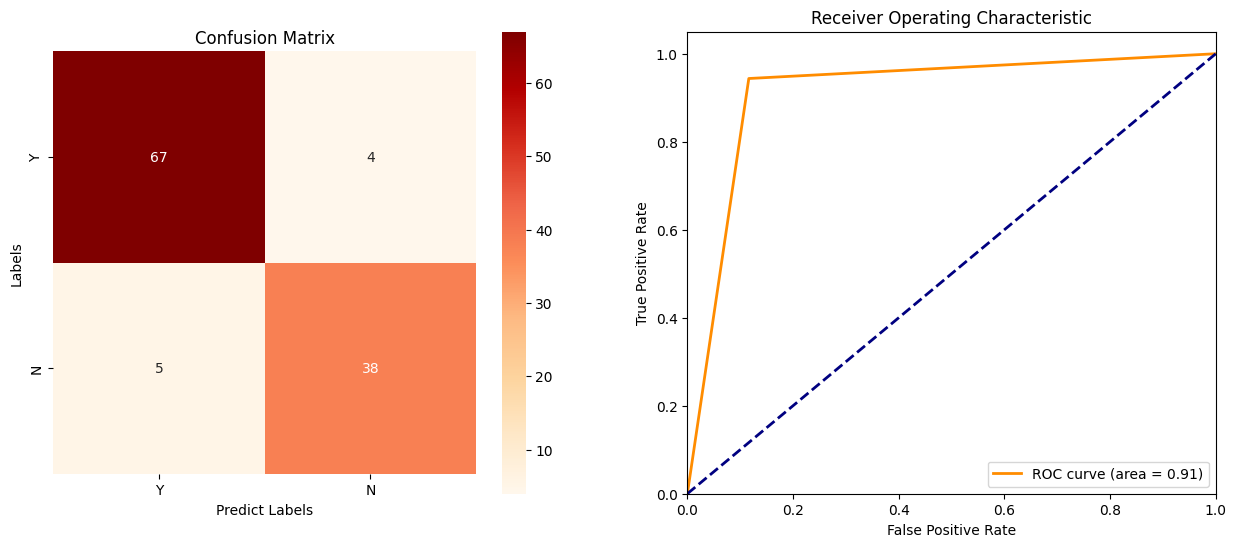

In [55]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# 虽然这个混淆矩阵是个 array 没有标签，但对应的标签就是按我下面labels的顺序排列的
mat = confusion_matrix(y2_test, y2_pred, labels=[1, 0])

# 计算AUC和ROC曲线下的面积(AUC value)和横坐标为fpr,纵坐标为tpr的点
auc_value = metrics.roc_auc_score(y2_test, y2_pred)
fpr, tpr, _ = metrics.roc_curve(y2_test, y2_pred)
roc_auc_point = auc(fpr, tpr)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

sns.heatmap(mat, annot=True, square="equal", cmap="OrRd", ax=ax[0],
    xticklabels=["Y", "N"], 
    yticklabels=["Y", "N"])
ax[0].set_xlabel("Predict Labels")
ax[0].set_ylabel("Labels")
ax[0].set_title("Confusion Matrix")

ax[1].plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_point)
ax[1].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
ax[1].set_xlim([0.0, 1.0])
ax[1].set_ylim([0.0, 1.05])
ax[1].set_xlabel('False Positive Rate')
ax[1].set_ylabel('True Positive Rate')
ax[1].set_title('Receiver Operating Characteristic')
plt.legend(loc="lower right")


In [56]:
from sklearn.metrics import classification_report

# 打印分类模型最好的评价系统
print("评估数据结果打印:\n", classification_report(y2_test, y2_pred))

评估数据结果打印:
               precision    recall  f1-score   support

           0       0.90      0.88      0.89        43
           1       0.93      0.94      0.94        71

    accuracy                           0.92       114
   macro avg       0.92      0.91      0.92       114
weighted avg       0.92      0.92      0.92       114

